In [1]:
!pip install mplcyberpunk
import os
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplcyberpunk
plt.style.use("cyberpunk")
import seaborn as sns
import time
import cv2
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
import io
from PIL import Image
from warnings import filterwarnings
import pathlib

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"f4uzan021102","key":"87e4aa414cd498b27cbd8e78d060c121"}'}

In [3]:
!kaggle datasets download -d sartajbhuvaji/brain-tumor-classification-mri
!unzip brain-tumor-classification-mri.zip

Dataset URL: https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri
License(s): MIT
 76% 66.0M/86.8M [00:00<00:00, 239MB/s]
100% 86.8M/86.8M [00:00<00:00, 237MB/s]
Archive:  brain-tumor-classification-mri.zip
  inflating: Testing/glioma_tumor/image(1).jpg  
  inflating: Testing/glioma_tumor/image(10).jpg  
  inflating: Testing/glioma_tumor/image(100).jpg  
  inflating: Testing/glioma_tumor/image(11).jpg  
  inflating: Testing/glioma_tumor/image(12).jpg  
  inflating: Testing/glioma_tumor/image(13).jpg  
  inflating: Testing/glioma_tumor/image(14).jpg  
  inflating: Testing/glioma_tumor/image(15).jpg  
  inflating: Testing/glioma_tumor/image(16).jpg  
  inflating: Testing/glioma_tumor/image(17).jpg  
  inflating: Testing/glioma_tumor/image(18).jpg  
  inflating: Testing/glioma_tumor/image(19).jpg  
  inflating: Testing/glioma_tumor/image(2).jpg  
  inflating: Testing/glioma_tumor/image(20).jpg  
  inflating: Testing/glioma_tumor/image(21).jpg  
  inflating: Testing

In [4]:
X_train = []
y_train = []
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']


image_size = 128
for i in labels:
    folderPath = os.path.join('/content/Training',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)

for i in labels:
    folderPath = os.path.join('/content/Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)

X_train = np.array(X_train)
y_train = np.array(y_train)

100%|██████████| 74/74 [00:00<00:00, 237.01it/s]


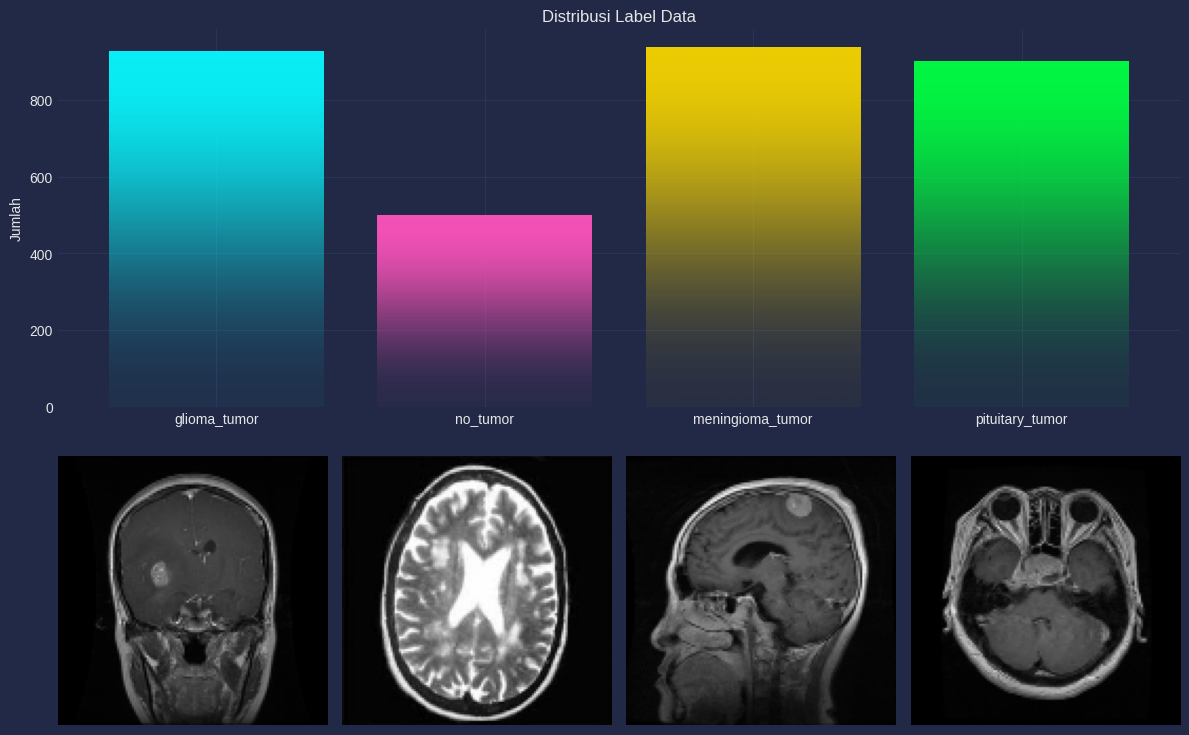

In [5]:
label_counts = {label: np.sum(y_train == label) for label in labels}

plt.figure(figsize=(12, 8))

colors = ["C0", "C1", "C2", "C3"]


plt.subplot(2, 1, 1)
bars = plt.bar(label_counts.keys(), label_counts.values(), color=colors)
mplcyberpunk.add_bar_gradient(bars=bars)

plt.ylabel('Jumlah')
plt.title('Distribusi Label Data')

k = 0
for i in labels:
    j = 0
    while True:
        if y_train[j] == i:
            plt.subplot(2, 4, k + 5)
            plt.imshow(X_train[j])
            plt.axis('off')
            k += 1
            break
        j += 1

plt.tight_layout()
plt.show()

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.2,random_state=42)

In [7]:
X_train = X_train / 255
X_test = X_test / 255

print(f"Maximum and Minimum pixel value after normalization: {X_train.max()} - {X_train.min()}")

Maximum and Minimum pixel value after normalization: 1.0 - 0.0


In [8]:
from tensorflow.keras import regularizers

model = Sequential()

model.add(Input(shape=(128, 128, 3)))

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Dropout(0.3))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Dropout(0.3))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)))
model.add(MaxPooling2D())
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,194,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,288,196 (16.36 MB)

 Trainable params: 4,288,196 (16.36 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.95 and logs.get('val_accuracy') > 0.95):
      print("\n accuracy train and validation diatas 95% didapatkan")
      self.model.stop_training = True

callbacks = myCallback()

In [10]:
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
y_train_encoded = encoder.fit_transform(y_train)

In [11]:
start_time = time.time()
history = model.fit(X_train, y_train_encoded, validation_split=0.2, epochs=100, verbose=1, batch_size=32, callbacks=[callbacks])
end_time = time.time()

runtime = end_time - start_time
print("Total runtime:", runtime, "seconds")

Epoch 1/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 17s 127ms/step - accuracy: 0.3836 - loss: 1.6470 - val_accuracy: 0.5526 - val_loss: 1.3500
Epoch 2/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.5717 - loss: 1.2157 - val_accuracy: 0.6788 - val_loss: 1.0369
Epoch 3/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6559 - loss: 1.0014 - val_accuracy: 0.6998 - val_loss: 0.9784
Epoch 4/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7266 - loss: 0.9042 - val_accuracy: 0.6750 - val_loss: 0.9432
Epoch 5/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7409 - loss: 0.8553 - val_accuracy: 0.7706 - val_loss: 0.8642
Epoch 6/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.7673 - loss: 0.8451 - val_accuracy: 0.8069 - val_loss: 0.7832
Epoch 7/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.8111 - loss: 0.7460 - val_accuracy: 0.8145 - val_loss: 0.7600
Epoch 8/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.8262 - loss: 0.7332 - val_accuracy: 

In [12]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(encoder.transform(y_test), axis=1)

train_accuracy = model.evaluate(X_train, y_train_encoded, verbose=0)[1]
test_accuracy = accuracy_score(y_test_classes, y_pred_classes)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step
Train Accuracy: 0.9804672598838806
Test Accuracy: 0.889739663093415


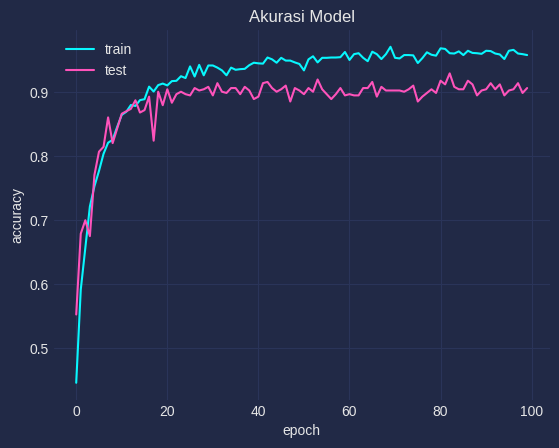

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

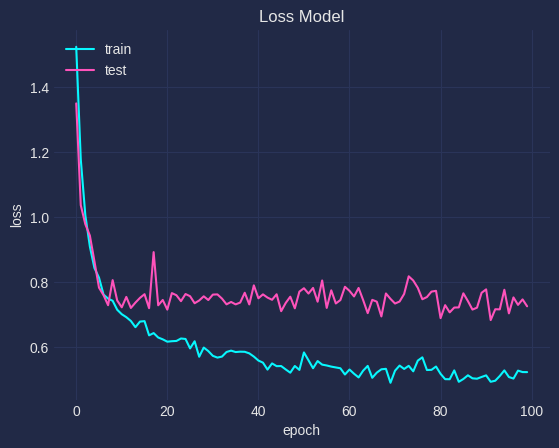

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

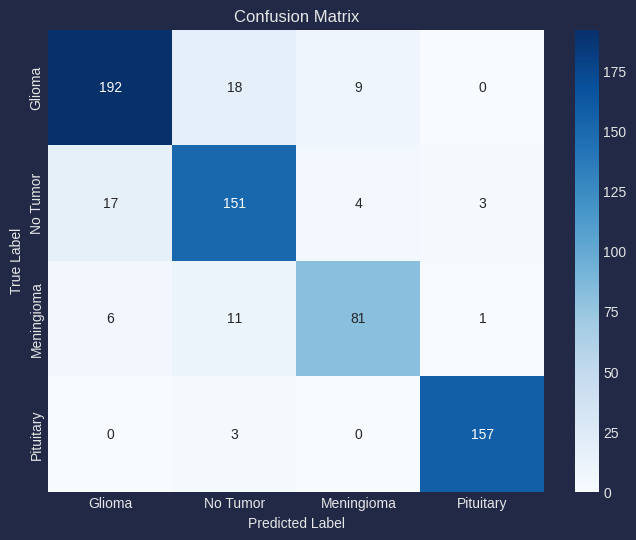

              precision    recall  f1-score   support

      Glioma       0.89      0.88      0.88       219
    No Tumor       0.83      0.86      0.84       175
  Meningioma       0.86      0.82      0.84        99
   Pituitary       0.98      0.98      0.98       160

    accuracy                           0.89       653
   macro avg       0.89      0.88      0.89       653
weighted avg       0.89      0.89      0.89       653



In [15]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_classes, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Glioma', 'No Tumor', 'Meningioma', 'Pituitary'],
            yticklabels=['Glioma', 'No Tumor', 'Meningioma', 'Pituitary'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test_classes, y_pred_classes, target_names=['Glioma', 'No Tumor', 'Meningioma', 'Pituitary']))

* 0 - Glioma Tumor
* 1 - No Tumor
* 2 - Meningioma Tumor
* 3 - Pituitary Tumor

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step
Predicted label: glioma_tumor 
Actual label: glioma_tumor 
Confidence: 100.00%



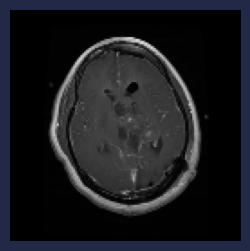

In [16]:
random_index = np.random.randint(0, len(X_test))
random_img = X_test[random_index]
predictions = model.predict(random_img.reshape(1, 128, 128, 3))

predicted_class = np.argmax(predictions)
predicted_label = labels[predicted_class]
confidence = predictions[0][predicted_class]

actual_index = y_test[random_index]
actual_class = np.argmax(actual_index)
actual_label = labels[actual_class]

print(f"\033[94mPredicted label: {predicted_label}\033[0m \n\033[92mActual label: {actual_label}\033[0m \n\033[93mConfidence: {confidence*100:.2f}%\033[0m\n")
plt.figure(figsize = (3,3))
plt.imshow(random_img)
plt.axis('off')
plt.show()

In [17]:
model.save('my_model.h5')

In [18]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)

Saved artifact at '/tmp/tmp8b07xy2d'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  134572003378800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134572003355360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134571797757648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134571983783712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134571983794448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134571983796736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134571983982960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134571983990176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134571983994400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134571984179216: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [19]:
!ls -la | grep 'model'

-rw-r--r-- 1 root root 17156740 Nov  2 07:41 model.tflite
-rw-r--r-- 1 root root 51512544 Nov  2 07:41 my_model.h5
